In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Q1.  Read the image cameraman.tif, follow the steps for global thresholding

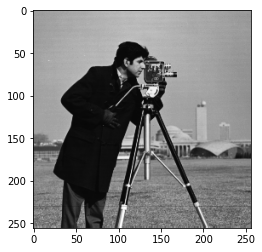

In [72]:
img = cv2.imread("cameraman.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray", vmin = 0, vmax = 255)

a) Select an initial estimate for T (select T to be the mean gray value of the image to be segmented). Segment image using the equation

118.7244873046875


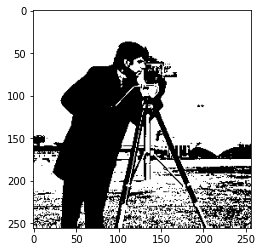

In [73]:
G = img.copy()
T = G.mean()
print(T)
G[img < T] = 0
G[img >= T] = 1
plt.imshow(G, cmap="gray", vmin = 0, vmax = 1)

(b) Segmentation of image using T will produce two groups of pixels: G1 consists of all pixels with gray level values > T and G2 consisting of pixels with values ≤T. <br>
(c) Compute the average gray level values A1 for the pixels in regions G1 and A2 for the pixels in regions G2.<br>
(d) Compute a new threshold value T=0.5 (A1+A2)<br>
(e) Repeat steps (b) through (d) until the difference between values of T in successiveiterations is smaller than a predefined parameter T0. (In this exercise, T0=1)

In [74]:
T = img.mean()
Tprev = 500
while abs(T - Tprev) >= 1:
   A1 = img[img > T].mean()
   A2 = img[img <= T].mean()
   Tprev = T
   T = (A1 + A2) / 2
print(T)

88.77114591478212


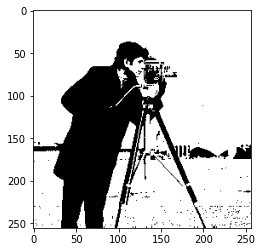

In [75]:
img[img < T] = 0
img[img >= T] = 255
plt.imshow(img, cmap="gray", vmin = 0, vmax = 255)

### Q2. Consider the following image segment I. Based on the histogram, segment the image into two regions


In [76]:
I = np.array([[128,128,128,64,64,32,32,8],
[64,64,128,128,128,8,32,32],
[32,8,64,128,128,64,64,64],
[8,128,128,64,64,8,64,64],
[128,64,64,64,128,128,8,8],
[64,64,64,128,128,128,32,32],
[8,128,32,64,64,128,128,128],
[8,8,64,64,128,128,64,64]])

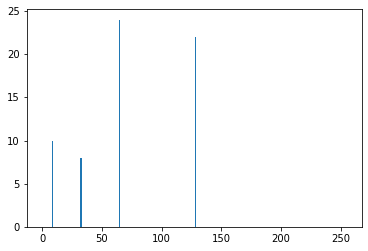

In [77]:
b, bins, patches = plt.hist(I.flatten(), bins=range(256))

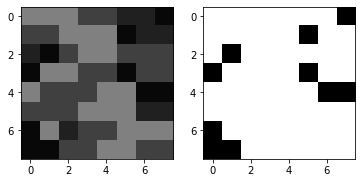

In [78]:
T = 32
plt.subplot(1, 2, 1)
plt.imshow(I, cmap="gray", vmin=0, vmax=255)
I[I < T] = 0
I[I >= T] = 255
plt.subplot(1, 2, 2)
plt.imshow(I, cmap="gray", vmin = 0, vmax = 255)

In [79]:
print(I)

[[255 255 255 255 255 255 255   0]
 [255 255 255 255 255   0 255 255]
 [255   0 255 255 255 255 255 255]
 [  0 255 255 255 255   0 255 255]
 [255 255 255 255 255 255   0   0]
 [255 255 255 255 255 255 255 255]
 [  0 255 255 255 255 255 255 255]
 [  0   0 255 255 255 255 255 255]]


### Q3  Read an input image, cameraman.tif and compute the edges in the image using different edge detectors like Robert, Prewittt and Sobel. Comment on the results obtained.

In [80]:
def convolve_2D(image, kernel):
    return ccorrelation_2d(image, np.flipud(np.fliplr(kernel)))

def ccorrelation_2d(image, kernel):
    paddingl = kernel.shape[0] - 1
    paddingu = kernel.shape[1] - 1
    # Shape of Output Convolution
    xOutput = int(((image.shape[0] - kernel.shape[0] + 2 * paddingl) ) + 1)
    yOutput = int(((image.shape[1] - kernel.shape[1] + 2 * paddingu) ) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    imagePadded = np.pad(image, ((paddingl, paddingl), (paddingu, paddingu)))

    # Iterate through image
    for y in range(yOutput):
        for x in range(xOutput):
            output[x, y] = np.sum(kernel * imagePadded[x: x + kernel.shape[0], y: y + kernel.shape[1]])
    return output

In [81]:
robertsFilterx = np.array([[1, 0], [0, -1]])
robertsFiltery = np.flipud(robertsFilterx).transpose()

sobelFilterx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobelFiltery = np.flipud(sobelFilterx).transpose()

prewittFilterx = np.array([[-1, 0, 1]]*3)
prewittFiltery = np.flipud(prewittFilterx).transpose()

laplacianFilter = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

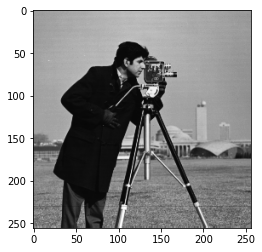

In [82]:
img = cv2.imread("cameraman.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray", vmin = 0, vmax = 255)

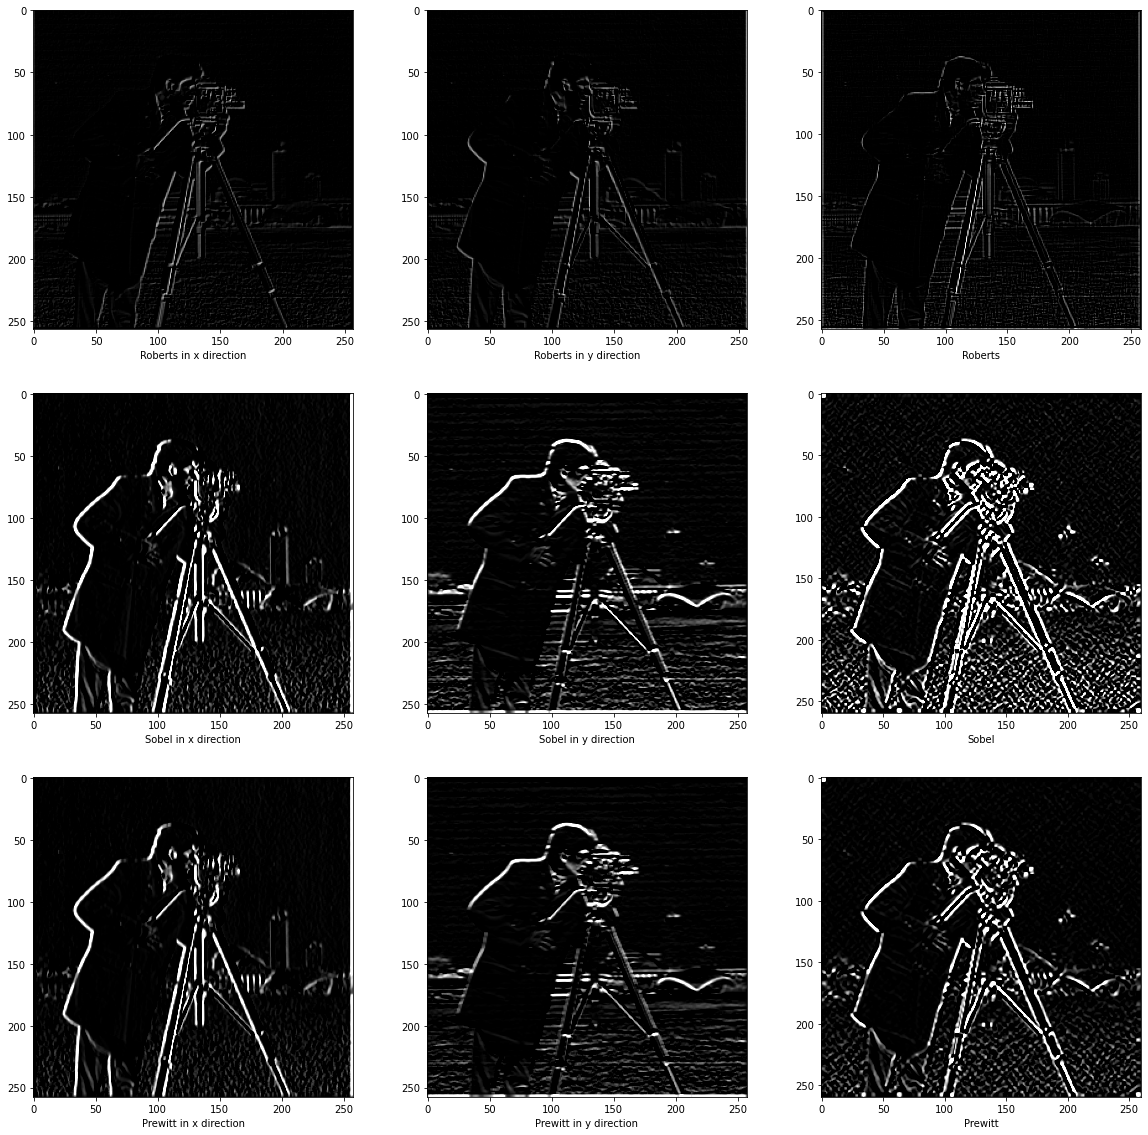

In [87]:
filters = [[robertsFilterx, robertsFiltery], [sobelFilterx, sobelFiltery], [prewittFilterx, prewittFiltery]]
labels = ["Roberts", "Sobel", "Prewitt"]
fig = plt.figure(figsize= (20, 20))
for i, filter in list(enumerate(filters)):
  plt.subplot(3, 3, 3*i+1)
  plt.imshow(convolve_2D(img, filter[0]), cmap="gray", vmin = 0, vmax = 255)
  plt.xlabel(labels[i] + " in x direction")

  plt.subplot(3, 3, 3*i+2)
  plt.imshow(convolve_2D(img, filter[1]), cmap="gray", vmin = 0, vmax = 255)
  plt.xlabel(labels[i] + " in y direction")

  plt.subplot(3, 3, 3*i+3)
  plt.imshow(convolve_2D(convolve_2D(img, filter[0]), filter[1]), cmap="gray", vmin = 0, vmax = 255)
  plt.xlabel(labels[i])


Roberts: The kernels respond maximally to edges running 45 degree to the matrix, each kernel in the corresponding x and y orientations. Not as accurate as the other operators since it is very sensitive to noise.<br><br>
Sobel: The result shows how abruptly or smoothly the image changes at each
pixel, and therefore how likely it is that that pixel represents an edge while also pointing out the orientation of that edge. It computes this by analysing the gradient of the image intensity function. Diagonal direction points are not always preserved. <br><br>
Prewitt: The result is similar to Sobel operator. The kernels respond maximally to edges running 45 degree to the matrix, each kernel in the corresponding x and y orientations. Best to detect the orientation of an image. 

### Q4 The region-growing algorithm starts with a seed pixel. The selection of the seed pixel depends on application. You are given two applications: (a) target detection in night vision, and (b) mammogram. Suggest a way to choose the seed pixel in these two applications.

For target detection in night vision, the brightest pixel can be used as a seed pixel since the brightest pixel can identify a region of the segmentation to start in. <br>
For mammogram, the tumors or calcifications may be present within the breast has distinctly higher intensity values than the normal tissues of the breast. Therefore the brightest pixel can be used as the seed pixel. <br>
For both these application we can also automatically generate a seed pixel by analysing the histogram. This includes taking the pixels corresponding to the strongest peaks as the starting seed pixel. These seeds are the position ofact as the starting pixel for the region-growing algorithm.